# Limpando os dados

In [84]:
import csv
import pandas as pd

data = []
with open('demandas.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='"')
    data = list(spamreader)
    for x in range(len(data)):
        data[x] = [y.replace(";", ",").rstrip() for y in data[x]]        

df = pd.DataFrame(data[1:], columns = data[0])
df['abertura'] =  pd.to_datetime(df['abertura'], format='%Y-%m-%d')

df = df.drop_duplicates()
print(df[df['origem'] == 'Facebook - 1'].count())
print(df[df['origem'] == 'Facebook - 2'].count())
df.loc[df['origem'] == 'Facebook - 1', 'origem'] = 'Facebook'
df.loc[df['origem'] == 'Facebook - 2', 'origem'] = 'Facebook'


abertura            1075
tipo                1075
solicitacao         1075
descricao           1075
tipo_solicitacao    1075
origem              1075
situacao            1075
dtype: int64
abertura            234
tipo                234
solicitacao         234
descricao           234
tipo_solicitacao    234
origem              234
situacao            234
dtype: int64


# Entendendo os Dados
1. **OS DADOS NÃO FORAM ANONIMIZADOS** existem chamados que possuem dados pessoais das pessoas.
2. Existem vários chamados de "teste" ou com dados estranhos como links ou códigos (provavlemente bots), além de chamados repetidos
3. Pedidos da categoria de Lei de Acesso a Informação (LAI) existem vários pedidos de dados para teses


In [82]:
df.describe()

,abertura,tipo,solicitacao,descricao,tipo_solicitacao,origem,situacao
count,7384,7384,7384,7384,7384,7384,7384
unique,535,97,7316,40,6,10,2
top,2017-02-06 00:00:00,Iluminação Pública Irregular,teste,Centro,Solicitação de Serviço,Telefone,Fechado
freq,52,1606,4,1294,4131,4487,5761
first,2015-10-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


## Abertura
Dia em que foi aberto o chamado

## Solicitação

## Descrição

## Origem 

## Solicitação

## Tipo de Solicitação
LAI - Lei de Acesso a Informação

In [37]:
print("Tipos de Solicitação")
print(df['tipo_solicitacao'].value_counts())
print("\n")

#for row in df[df['tipo_solicitacao'] == 'Audiência Pública']['solicitacao']:
#    print(row + "\n")

Tipos de Solicitação
Solicitação de Serviço    4131
Denuncia                  1609
Reclamação                1275
Informação                 209
LAI                         96
Audiência Pública           64
Name: tipo_solicitacao, dtype: int64




## Tipo

# Hipóteses


## Origem dos chamados

In [39]:
%matplotlib inline

#import matplotlib.pyplot as plt
from matplotlib.pyplot import *

origem = df['origem'].value_counts()
#origem['Facebook'] = origem['Facebook - 1'] + origem['Facebook - 2']
#del(origem['Facebook - 1'])
#del(origem['Facebook - 2'])
origem = origem.sort_values()
print(origem)


Radio escuta                  1
Colab                         1
Instagram                     3
Email                        49
Audiências Públicas          68
Lai                          92
Portal da transparência     294
Presencial                 1080
Facebook                   1309
Telefone                   4487
Name: origem, dtype: int64


#### Quantidade de chamados por tipo

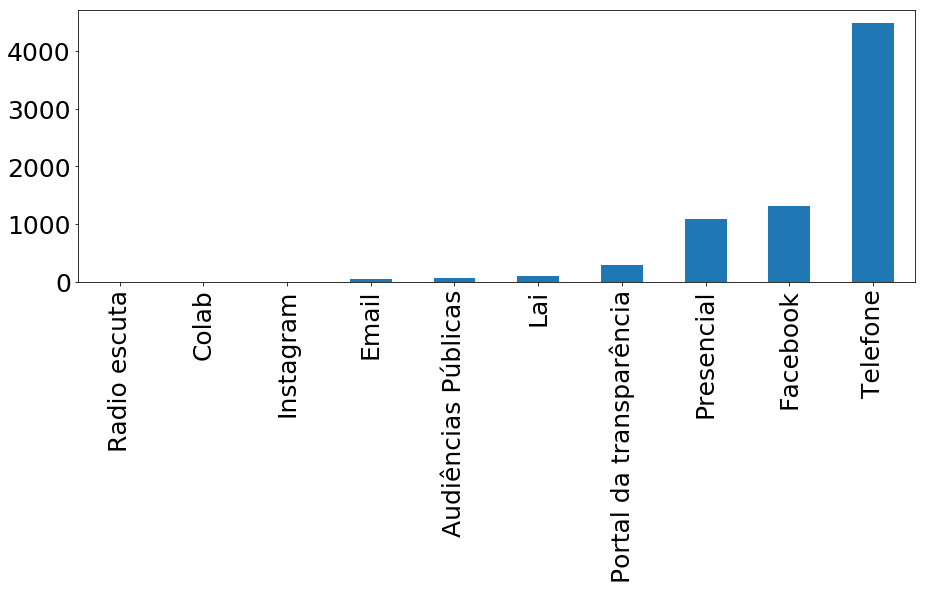

In [80]:
origem.plot(kind="bar", figsize=(15, 5), fontsize=25)

#### Quantidade de chamados por tipo no ano de 2017

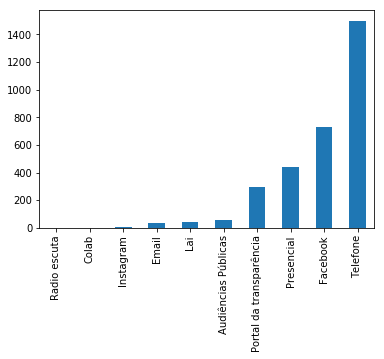

In [42]:
df[df['abertura'] >= '2017-01-01']['origem'].value_counts().sort_values().plot(kind="bar")

### Qual a visão geral do atendimento entre Facebook, Telefone, Presencial e Portal da Transparência?

In [43]:
facebook = df.loc[df['origem'] == 'Facebook']['abertura'].value_counts().sort_index()
telefone = df.loc[df['origem'] == 'Telefone']['abertura'].value_counts().sort_index()
presencial = df.loc[df['origem'] == 'Presencial']['abertura'].value_counts().sort_index()
transparencia = df.loc[df['origem'] == 'Portal da transparência']['abertura'].value_counts().sort_index()

#print(facebook.sum()/)
for x in zip([facebook, telefone, presencial, transparencia], ["facebook", "telefone", "presencial", "transparencia"]):
    #media = x[0].count()/df.count().abertura    
    media = x[0].sum()/len(df.abertura.unique())
    print("Média de atendimentos por " + x[1] + ": " + str(media))

Média de atendimentos por facebook: 2.446728971962617
Média de atendimentos por telefone: 8.386915887850467
Média de atendimentos por presencial: 2.0186915887850465
Média de atendimentos por transparencia: 0.5495327102803739


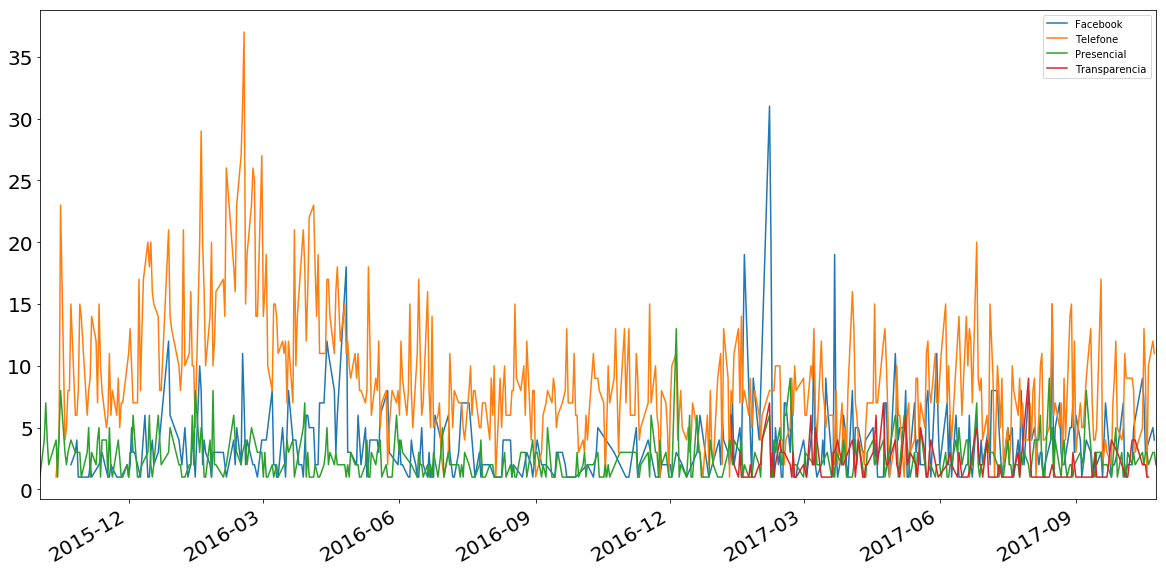

In [86]:
fig, ax = subplots()

facebook.plot(kind="line", figsize=(20, 10), fontsize=20, legend=True, ax=ax)
telefone.plot(kind="line", figsize=(20, 10), fontsize=20, legend=True, ax=ax)
presencial.plot(kind="line", figsize=(20, 10), fontsize=20, legend=True, ax=ax)
transparencia.plot(kind="line", figsize=(20, 10), fontsize=20, legend=True, ax=ax)
ax.legend(["Facebook", "Telefone", "Presencial", "Transparencia"]);

### Qual a visão geral do atendimento entre Facebook, Telefone e Presencial no ultimo ano?

In [85]:
for x in zip([facebook.loc[facebook.index >= '2017-01-01'], telefone.loc[telefone.index >= '2017-01-01'], presencial.loc[presencial.index >= '2017-01-01'], transparencia.loc[transparencia.index >= '2017-01-01']], ["facebook", "telefone", "presencial", "transparencia"]):        
    media = x[0].sum()/len(df[df.abertura >= '2017-01-01'].abertura.unique())    
    print("Média de atendimentos por " + x[1] + " em 2017: " + str(media))
print("\n")

for x in zip([facebook.loc[('2016-01-01' <= facebook.index) &  (facebook.index < '2017-01-01')], telefone.loc[('2016-01-01' <= telefone.index) &  (telefone.index < '2017-01-01')], presencial.loc[('2016-01-01' <= presencial.index) &  (presencial.index < '2017-01-01')], transparencia.loc[('2016-01-01' <= transparencia.index) &  (transparencia.index < '2017-01-01')]], ["facebook", "telefone", "presencial", "transparencia"]):    
    media = x[0].sum()/len(df[('2016-01-01' <= df.abertura) & (df.abertura < '2017-01-01')].abertura.unique())    
    print("Média de atendimentos por " + x[1] + " em 2016: " + str(media))

print("\n")
    
for x in zip([facebook.loc[('2015-01-01' <= facebook.index) &  (facebook.index < '2016-01-01')], telefone.loc[('2015-01-01' <= telefone.index) &  (telefone.index < '2016-01-01')], presencial.loc[('2015-01-01' <= presencial.index) &  (presencial.index < '2016-01-01')], transparencia.loc[('2015-01-01' <= transparencia.index) &  (transparencia.index < '2016-01-01')]], ["facebook", "telefone", "presencial", "transparencia"]):    
    media = x[0].sum()/len(df[('2015-01-01' <= df.abertura) & (df.abertura < '2016-01-01')].abertura.unique())    
    print("Média de atendimentos por " + x[1] + " em 2015: " + str(media))    

Média de atendimentos por facebook em 2017: 3.452830188679245
Média de atendimentos por telefone em 2017: 7.066037735849057
Média de atendimentos por presencial em 2017: 2.0754716981132075
Média de atendimentos por transparencia em 2017: 1.3867924528301887


Média de atendimentos por facebook em 2016: 1.8850574712643677
Média de atendimentos por telefone em 2016: 9.310344827586206
Média de atendimentos por presencial em 2016: 1.8697318007662835
Média de atendimentos por transparencia em 2016: 0.0


Média de atendimentos por facebook em 2015: 1.3709677419354838
Média de atendimentos por telefone em 2015: 9.016129032258064
Média de atendimentos por presencial em 2015: 2.4516129032258065
Média de atendimentos por transparencia em 2015: 0.0


### Chamados acumulados no geral

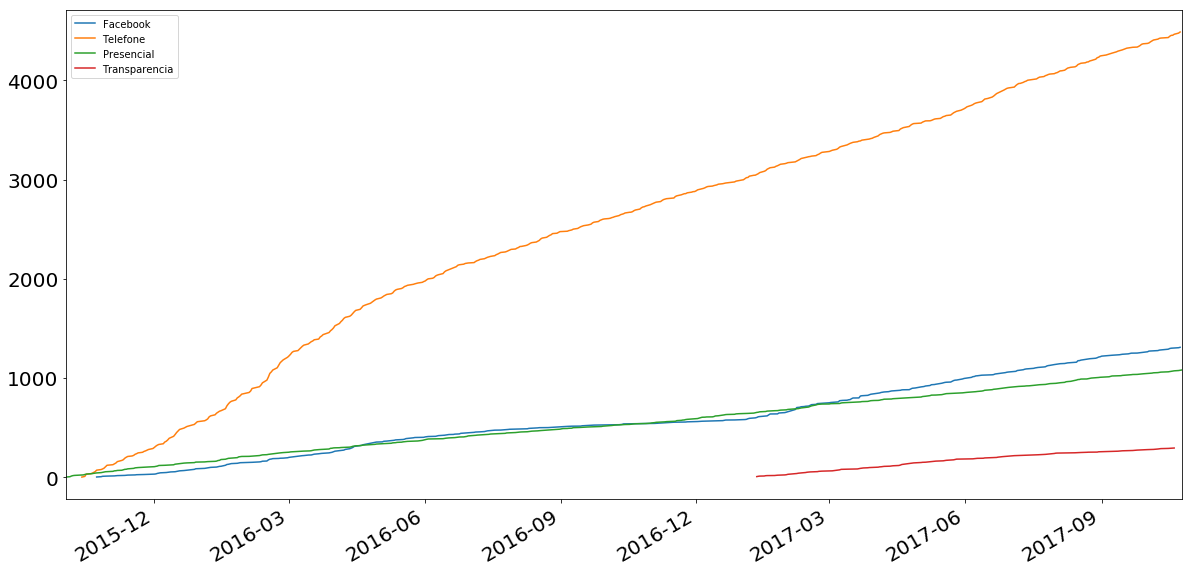

In [87]:
fig, ax = subplots()
facebook.cumsum().plot(kind="line", figsize=(20, 10), fontsize=20, legend=True, ax=ax)
telefone.cumsum().plot(kind="line", figsize=(20, 10), fontsize=20, legend=True, ax=ax)
presencial.cumsum().plot(kind="line", figsize=(20, 10), fontsize=20, legend=True, ax=ax)
transparencia.cumsum().plot(kind="line", figsize=(20, 10), fontsize=20, legend=True, ax=ax)
ax.legend(["Facebook", "Telefone", "Presencial", "Transparencia"]);

### Chamados acumulados em 2017

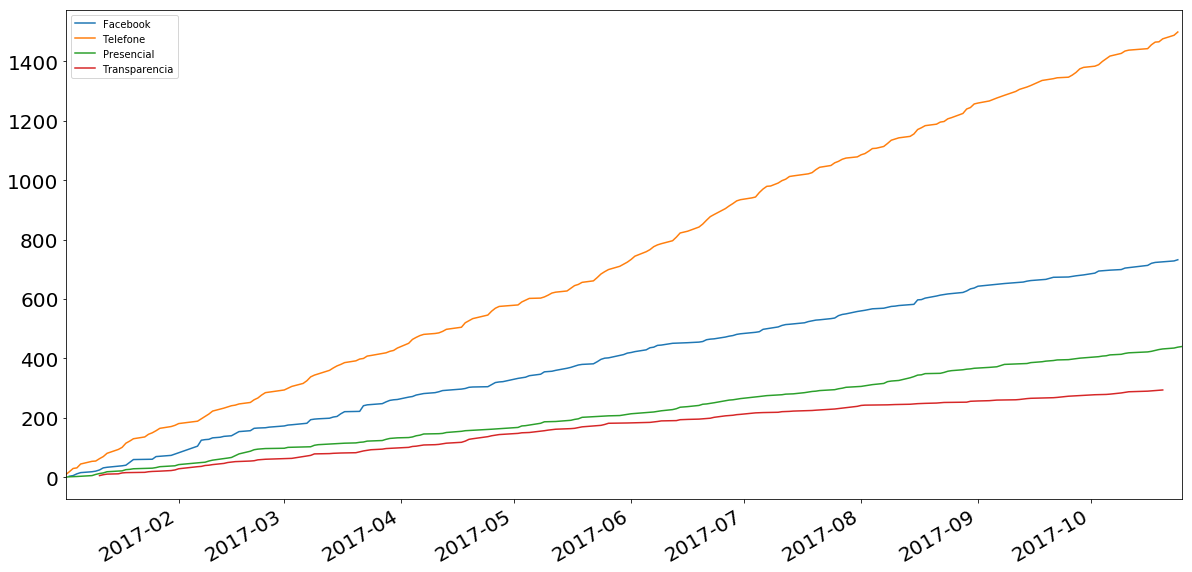

In [88]:
fig, ax = subplots()
facebook.loc[facebook.index >= '2017-01-01'].cumsum().plot(kind="line", figsize=(20, 10), fontsize=20, legend=True, ax=ax)
telefone.loc[telefone.index >= '2017-01-01'].cumsum().plot(kind="line", figsize=(20, 10), fontsize=20, legend=True, ax=ax)
presencial.loc[presencial.index >= '2017-01-01'].cumsum().plot(kind="line", figsize=(20, 10), fontsize=20, legend=True, ax=ax)
transparencia.loc[transparencia.index >= '2017-01-01'].cumsum().plot(kind="line", figsize=(20, 10), fontsize=20, legend=True, ax=ax)
ax.legend(["Facebook", "Telefone", "Presencial", "Transparencia"]);

In [48]:
print(facebook[facebook.index >= '2017-01-01'].sum())
print(presencial[presencial.index >= '2017-01-01'].sum())

732
440


## Comparar quantidade de chamados por bairro durante as diferentes gestões

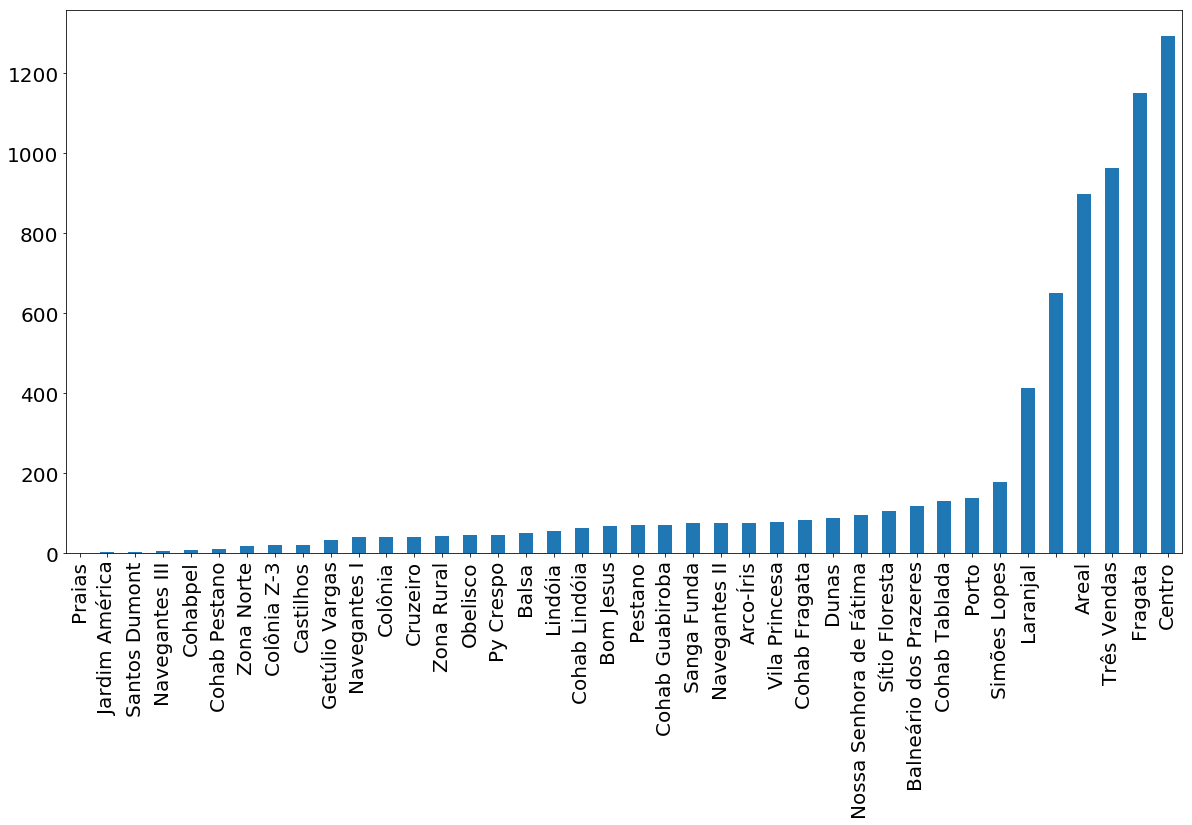

In [49]:
df.descricao.value_counts().sort_values().plot(kind="bar", figsize=(20, 10), fontsize=20)

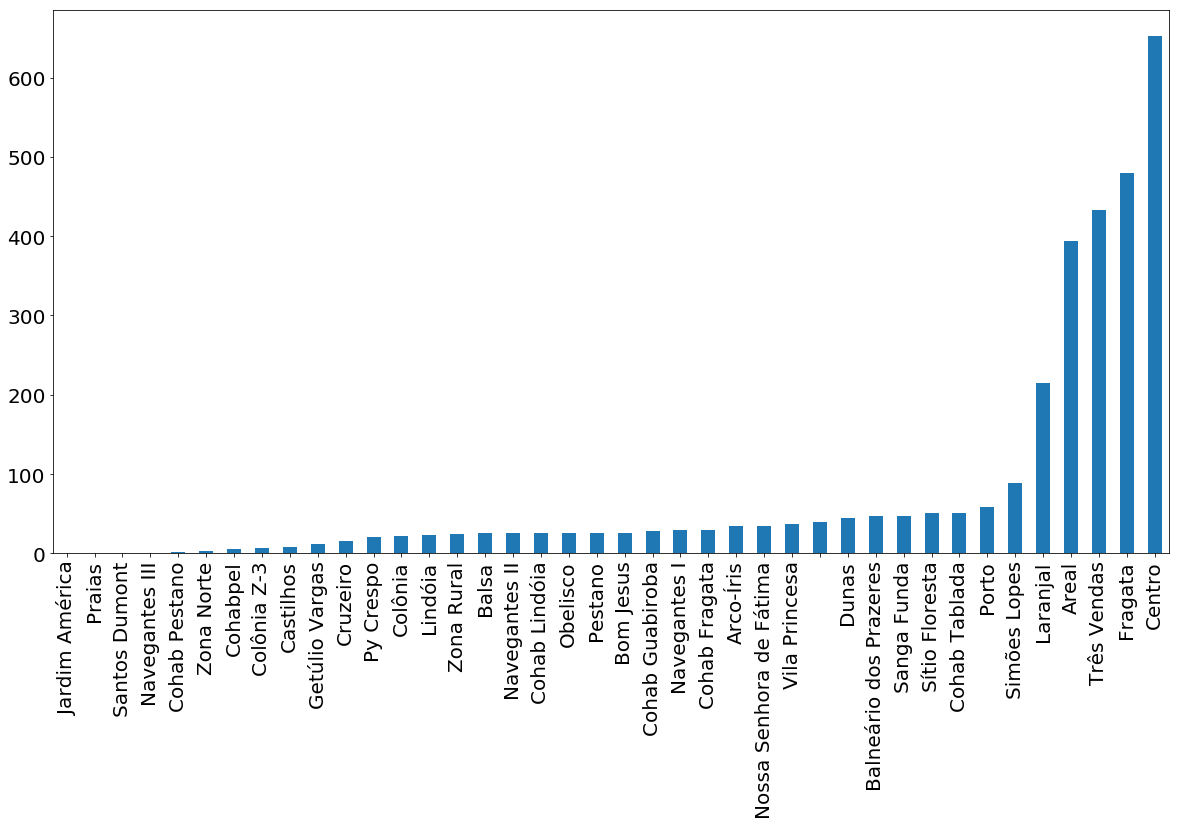

In [74]:
df[df['abertura'] >= '2017-01-01'].descricao.value_counts().sort_values().plot(kind="bar", figsize=(20, 10), fontsize=20)

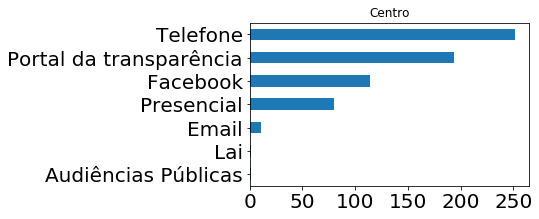

In [90]:
time = df['descricao'] == 'Centro'
df[time & (df['abertura'] >= '2017-01-01')].origem.value_counts().sort_values().plot(kind="barh", figsize=(5, 3), fontsize=20, title="Centro")

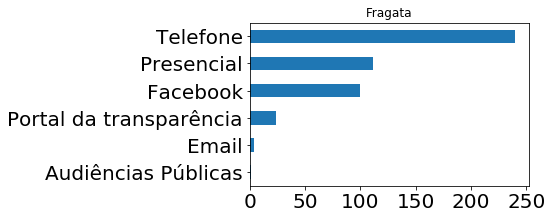

In [91]:
time = df['descricao'] == 'Fragata'
df[time & (df['abertura'] >= '2017-01-01')].origem.value_counts().sort_values().plot(kind="barh", figsize=(5, 3), fontsize=20, title="Fragata")

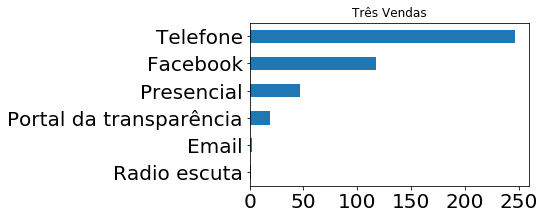

In [92]:
time = df['descricao'] == 'Três Vendas'
df[time & (df['abertura'] >= '2017-01-01')].origem.value_counts().sort_values().plot(kind="barh", figsize=(5, 3), fontsize=20, title="Três Vendas")

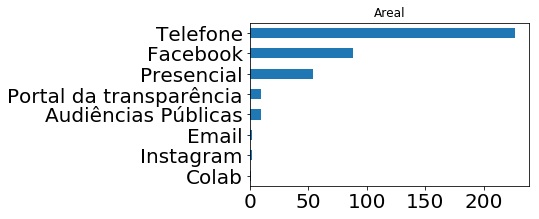

In [93]:
time = df['descricao'] == 'Areal'
df[time & (df['abertura'] >= '2017-01-01')].origem.value_counts().sort_values().plot(kind="barh", figsize=(5, 3), fontsize=20, title="Areal")

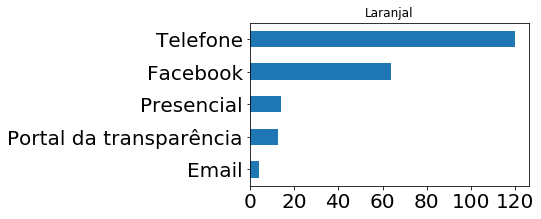

In [94]:
time = df['descricao'] == 'Laranjal'
df[time & (df['abertura'] >= '2017-01-01')].origem.value_counts().sort_values().plot(kind="barh", figsize=(5, 3), fontsize=20, title="Laranjal")

## Dengue ocorre em maior quantidade nos bairros pobres?? (Existem dados relacionado a "riqueza" dos bairros?)

In [56]:
df[df['tipo'] == "Foco de Dengue"].descricao.value_counts()

Centro                     60
Fragata                    45
                           32
Areal                      32
Três Vendas                31
Laranjal                   16
Porto                       8
Cohab Guabiroba             7
Simões Lopes                5
Navegantes II               5
Lindóia                     5
Nossa Senhora de Fátima     5
Cohab Tablada               4
Balsa                       4
Cruzeiro                    3
Arco-Íris                   3
Cohab Lindóia               3
Zona Rural                  2
Pestano                     2
Bom Jesus                   2
Sítio Floresta              2
Cohab Fragata               2
Balneário dos Prazeres      2
Navegantes I                2
Colônia Z-3                 1
Navegantes III              1
Castilhos                   1
Colônia                     1
Santos Dumont               1
Sanga Funda                 1
Vila Princesa               1
Getúlio Vargas              1
Dunas                       1
Cohab Pest

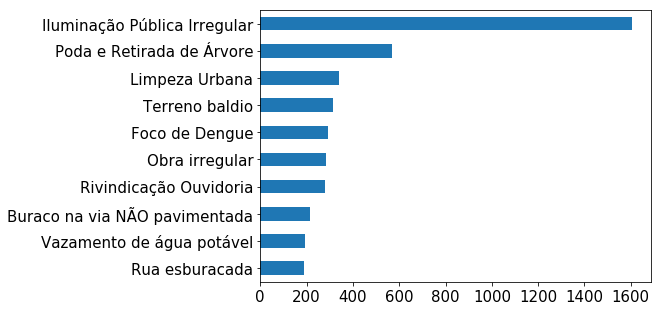

In [75]:
df['tipo'].value_counts().head(10).iloc[::-1].plot(kind="barh", figsize=(7, 5), fontsize=15)
#problemas = problemas[problemas['descricao'] != 'Centro'][problemas['descricao'] !=  'Fragata'][problemas['descricao'] !=  'Três Vendas'][problemas['descricao'] !=  'Areal'][problemas['descricao'] !=  'Laranjal'][problemas['descricao'] !=  '']
#problemas['tipo'].value_counts().head(10).iloc[::-1].plot(kind="barh", figsize=(5, 5), fontsize=15)

In [78]:
results = []
values = []
for bairro in df.descricao.unique():
    if(df[df['descricao'] == bairro].abertura.count() > 200):
        iluminacao = df[(df['tipo'] == "Iluminação Pública Irregular") & (df['descricao'] == bairro)]
        iluminacao = (iluminacao['descricao'].count()/df[df['descricao'] == bairro].abertura.count())
        results.append((bairro, iluminacao))
results.sort(key=lambda tup: tup[1], reverse=True)  # sorts in place
for x in results:
    print(x)

('Laranjal', 0.279126213592233)
('Fragata', 0.21739130434782608)
('Areal', 0.21690767519466073)
('Três Vendas', 0.21517671517671519)
('Centro', 0.20247295208655333)
('', 0.14153846153846153)


## Existem tipos de problemas que são associados a bairros específicos? NÃO


/home/lorenzo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


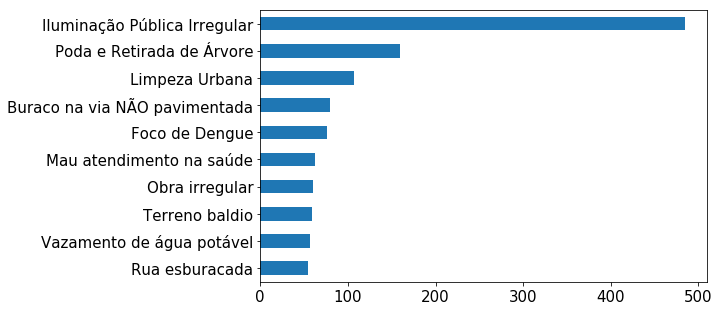

In [76]:
problemas = df.copy()
# Remove os bairros que mais aparecem para ver se existia algum padrão dos outros bairros
problemas = problemas[problemas['descricao'] != 'Centro'][problemas['descricao'] !=  'Fragata'][problemas['descricao'] !=  'Três Vendas'][problemas['descricao'] !=  'Areal'][problemas['descricao'] !=  'Laranjal'][problemas['descricao'] !=  '']
problemas['tipo'].value_counts().head(10).iloc[::-1].plot(kind="barh", figsize=(8, 5), fontsize=15)

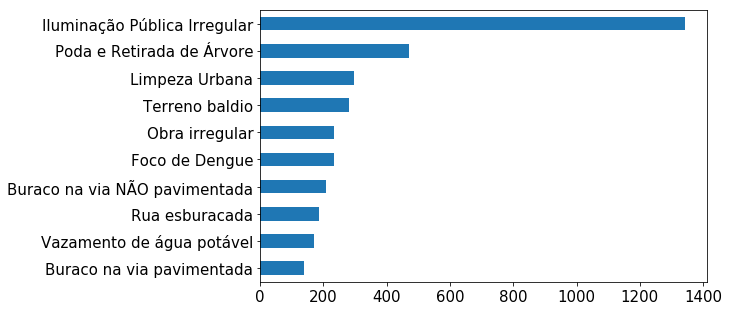

In [77]:
problemas = df.copy()
# Remove os bairros que mais aparecem para ver se existia algum padrão dos outros bairros
problemas1 = problemas[problemas['descricao'] != 'Centro']
problemas1['tipo'].value_counts().head(10).iloc[::-1].plot(kind="barh", figsize=(8, 5), fontsize=15)

In [61]:
indexes = problemas.tipo.value_counts().head().index
for problema in indexes:    
    #print(problema + ": " + str(df[df['tipo'] == problema].descricao.value_counts().head(6).describe()))
    print(problema + ": " + str(problemas[problemas['tipo'] == problema].descricao.value_counts().quantile(q=0.75)))
    print(problemas[problemas['tipo'] == problema].descricao.value_counts())
    #print(df[df['tipo'] == problema].descricao.value_counts().head(6))
    print("\n\n")

Iluminação Pública Irregular: 25.0
Simões Lopes               44
Porto                      40
Cohab Fragata              33
Cohab Tablada              32
Balneário dos Prazeres     31
Pestano                    29
Dunas                      28
Nossa Senhora de Fátima    25
Sanga Funda                22
Sítio Floresta             21
Navegantes II              18
Cohab Lindóia              17
Vila Princesa              16
Obelisco                   16
Arco-Íris                  15
Cohab Guabiroba            15
Lindóia                    12
Py Crespo                  11
Getúlio Vargas             10
Bom Jesus                  10
Cruzeiro                    9
Balsa                       9
Navegantes I                6
Cohabpel                    5
Zona Norte                  4
Zona Rural                  3
Colônia                     2
Castilhos                   1
Cohab Pestano               1
Name: descricao, dtype: int64



Poda e Retirada de Árvore: 8.0
Porto                      20
S

## Chamados resolvidos ou não?


In [79]:
total_chamados2015 = df[(df.abertura >= '2015-01-01') & (df.abertura < '2016-01-01')].abertura.count()
total_chamados2016 = df[(df.abertura >= '2016-01-01') & (df.abertura < '2017-01-01')].abertura.count()
total_chamados2017 = df[(df.abertura >= '2017-01-01')].abertura.count()

print("Total chamados 2015: " + str(total_chamados2015))
print("Total chamados 2016: " + str(total_chamados2016))
print("Total chamados 2017: " + str(total_chamados2017))                        
print()

outrosTotal = [0, 0, 0]
outrosAbertos = [0, 0, 0]
for bairro in df.descricao.unique():
    if bairro != "" and df[df.descricao == bairro].abertura.count() > 200:        
        print(bairro + ": " + str(df[(df.abertura >= '2017-01-01') & (df.descricao == bairro) & (df.situacao == "Aberto")].abertura.count()/df[(df.abertura >= '2017-01-01') & (df.descricao == bairro)].abertura.count()))
        print(bairro + ": " + str(df[(df.abertura >= '2016-01-01') & (df.abertura < '2017-01-01') & (df.descricao == bairro) & (df.situacao == "Aberto")].abertura.count()/df[(df.abertura >= '2016-01-01') & (df.abertura < '2017-01-01') & (df.descricao == bairro)].abertura.count()))
        print(bairro + ": " + str(df[(df.abertura >= '2015-01-01') & (df.abertura < '2016-01-01') & (df.descricao == bairro) & (df.situacao == "Aberto")].abertura.count()/df[(df.abertura >= '2015-01-01') & (df.abertura < '2016-01-01') & (df.descricao == bairro)].abertura.count()) + "\n")
    else:
        if bairro != "":
            outrosTotal[2] += df[(df.abertura >= '2017-01-01') & (df.descricao == bairro)].abertura.count()
            outrosTotal[1] += df[(df.abertura >= '2016-01-01') & (df.abertura < '2017-01-01') & (df.descricao == bairro)].abertura.count()
            outrosTotal[0] += df[(df.abertura >= '2015-01-01') & (df.abertura < '2016-01-01') & (df.descricao == bairro)].abertura.count()
            outrosAbertos[2] += df[(df.abertura >= '2017-01-01') & (df.descricao == bairro) & (df.situacao == "Aberto")].abertura.count()
            outrosAbertos[1] += df[(df.abertura >= '2016-01-01') & (df.abertura < '2017-01-01') & (df.descricao == bairro) & (df.situacao == "Aberto")].abertura.count()
            outrosAbertos[0] += df[(df.abertura >= '2015-01-01') & (df.abertura < '2016-01-01') & (df.descricao == bairro) & (df.situacao == "Aberto")].abertura.count()

print("Outros 2017: " +  str(outrosAbertos[2]/outrosTotal[2]))            
print("Outros 2016: " +  str(outrosAbertos[1]/outrosTotal[1]))            
print("Outros 2015: " +  str(outrosAbertos[0]/outrosTotal[0]))            

Total chamados 2015: 820
Total chamados 2016: 3469
Total chamados 2017: 3095

Fragata: 0.5
Fragata: 0.0491228070175
Fragata: 0.02

Três Vendas: 0.494226327945
Três Vendas: 0.0810810810811
Três Vendas: 0.0208333333333

Centro: 0.346094946401
Centro: 0.0798611111111
Centro: 0.0

Areal: 0.520304568528
Areal: 0.0497835497835
Areal: 0.0

Laranjal: 0.432558139535
Laranjal: 0.045197740113
Laranjal: 0.0

Outros 2017: 0.491486946652
Outros 2016: 0.0544554455446
Outros 2015: 0.00793650793651


O centro possui uma tava menor de chamados abertos do que os outros bairros. Isso se dá pq as pessoas do centro reclamam mais?
Ou pq elas reclamam dos mesmos problemas?
Ou pq tem uma quantidade mais de pessoas no centro?
Os chamados estao relacionados a quantidade de pessoas que circulam em um lugar ou a quantidade de moradores?
Ou pq a prefeitura direciona a maior parte dos serviços de manutenção para o centro?

## Dia com mais chamados

In [63]:
df.abertura.value_counts().head()

2017-02-06    52
2016-02-17    45
2016-02-16    45
2016-01-19    42
2017-06-26    38
Name: abertura, dtype: int64

In [64]:
df[df.origem == "Telefone"].abertura.value_counts().head()

2016-02-17    37
2016-02-16    31
2016-01-19    29
2016-02-29    27
2016-02-15    27
Name: abertura, dtype: int64

In [69]:
df[df.origem == "Presencial"].abertura.value_counts().head()

2016-12-05    13
2017-02-20     9
2017-08-14     9
2015-10-16     8
2016-01-15     8
Name: abertura, dtype: int64

In [65]:
df[df.origem == "Facebook"].abertura.value_counts().head()

2017-02-06    31
2017-02-07    20
2017-01-20    19
2017-03-22    19
2016-04-26    18
Name: abertura, dtype: int64

In [71]:
for x in df[df['abertura'] == '2016-12-05'].solicitacao:
    #print(x + '\n')

SyntaxError: unexpected EOF while parsing (<ipython-input-71-2e065acc028a>, line 2)

In [72]:
for x in df[df['abertura'] == '2017-02-06'].solicitacao:
    #print(x + '\n')

SyntaxError: unexpected EOF while parsing (<ipython-input-72-4da53764236c>, line 2)

{'Monday': 1653, 'Tuesday': 1530, 'Wednesday': 1550, 'Thursday': 1285, 'Friday': 1287, 'Saturday': 65, 'Sunday': 14}


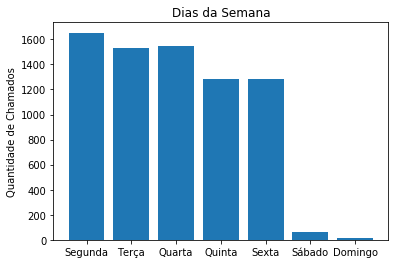

In [89]:
import datetime
import matplotlib.pyplot as plt

days = {
    'Monday': 0,
    'Tuesday': 0,
    'Wednesday': 0,
    'Thursday': 0,    
    'Friday': 0,
    'Saturday': 0,
    'Sunday': 0
}

for x in df.abertura:
    x = str(x).split("-")
    year = x[0]
    month = x[1]
    day = (x[2].split(" "))[0]    
    ans = datetime.date(int(year), int(month), int(day))    
    days[ans.strftime("%A")] += 1
print(days)

objects = ('Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo')
y_pos = np.arange(len(objects))
performance = []
for x in list(days.keys()):
    performance.append(days[x])    

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de Chamados')
plt.title('Dias da Semana')
 
plt.show()